<a href="https://www.kaggle.com/code/jayyanamandala/notebook237ef6df12?scriptVersionId=157258402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Multi-Class Prediction of Cirrhosis Outcomes
@misc{playground-series-s3e26,
    author = {Walter Reade, Ashley Chow},
    title = {Multi-Class Prediction of Cirrhosis Outcomes},
    publisher = {Kaggle},
    year = {2023},
    url = {https://kaggle.com/competitions/playground-series-s3e26}
}

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')

In [3]:
train_df.describe(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

(                id       N_Days           Age    Bilirubin  Cholesterol  \
 count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
 mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
 std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
 min       0.000000    41.000000   9598.000000     0.300000   120.000000   
 25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
 50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
 75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
 max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   
 
            Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
 count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   
 mean      3.548323    83.902846   1816.745250   114.604602     115.340164   
 std       0.346171    75.899266   1903.750657    48.790945      52.530402   
 m

In [4]:
train_df.shape, test_df.shape
missing_vals_train = train_df.isnull().sum()
missing_vals_train = missing_vals_train[missing_vals_train > 0].sort_values(ascending=False)

missing_vals_test = test_df.isnull().sum()
missing_vals_test = missing_vals_test[missing_vals_test > 0].sort_values(ascending=False)

# we can see there are no missing values
len(missing_vals_train), len(missing_vals_test)

(0, 0)

<quote>
    According to [https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)
    'Stage' is categorical
</quote>

In [5]:
# convert 'Stage' to Categorical
train_df['Stage'] = pd.Categorical(train_df.Stage)
test_df['Stage'] = pd.Categorical(test_df.Stage)

In [6]:
# get column lists to use in one-hot and scaling
category_col_list = list(train_df.select_dtypes(include=['object','category']))
numeric_col_list = list(test_df.select_dtypes(exclude=['object','category']))

# drop 'Status' from category_colelct_list
category_col_list.remove('Status')

# drop 'id' from numeric_col_list
numeric_col_list.remove('id')
print(category_col_list, numeric_col_list)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage'] ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


In [7]:
# shuffle the dataset and then remove 'ids' for futher preocessing
# set random seed
rast = np.random.RandomState(42)
from sklearn.model_selection import train_test_split

# since the training dataset is less than 8k 
# we will shuffle training and split into training and validation
shuffeT = np.random.permutation(train_df.shape[0])
train_shuffle = train_df.iloc[shuffeT,:]

# drop ID column from training and test sets
train_shuffle = train_shuffle.drop(['id'], axis=1)

test_id = test_df['id']
test_X = test_df.drop(['id'], axis=1)
test_X.shape, train_shuffle.shape

((5271, 18), (7905, 19))

In [8]:
# test data did not scale properly using code to scale
train_X = train_shuffle.iloc[:,:18]
mean = train_X[numeric_col_list].mean(axis = 0)
std = train_X[numeric_col_list].std(axis = 0)

train_X[numeric_col_list] -= mean
train_X[numeric_col_list]  /= std
print(train_X[numeric_col_list].head(5))

# test_X1 = test_X.copy()
test_X[numeric_col_list] -= mean
test_X[numeric_col_list]  /= std
print(test_X[numeric_col_list].head(5))

        N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  \
2023  0.976781  0.256757  -0.523080    -0.509583  1.420332 -0.222701   
6535 -0.341036  1.133940   0.368615     0.498712  0.293720 -0.934170   
6990 -0.744058  0.793719  -0.260817     0.119962 -3.519426 -0.459857   
6965  2.133755 -0.635645  -0.523080    -0.704076 -1.006216 -0.736540   
496   0.355342  0.538281  -0.496854     0.693206  1.131457 -0.130474   

      Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  
2023 -0.599209 -1.300541      -0.177805   0.809130    -0.037688  
6535 -0.628625 -0.156886      -0.177805   0.031681    -0.293530  
6990  0.500199  0.414942       0.450403   0.088847    -0.293530  
6965 -0.638605 -1.109931      -0.901196  -0.620004     0.857756  
496  -0.661192 -0.392380      -0.139732   0.786264    -0.037688  
     N_Days       Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0  1.653053  0.367084  -0.365722     1.000301 -0.515129 -0.249052 -0.094942   
1  0.400122 -

In [9]:
# remove '-' from 'Drug' in train and test sets
import re
train_X['Drug'] = train_X['Drug'].map(lambda x: re.sub("-","", x))
test_X['Drug'] = test_X['Drug'].map(lambda x: re.sub("-","", x))

In [10]:
# split test set
# split train dataset into train_X and train_y
train_X = train_shuffle.iloc[:,:18]
train_y = train_shuffle.iloc[:,18:]

In [11]:
# one-hot encoding using Pandas Dataframe get_dummies
train_y = pd.get_dummies(train_y, dtype='int')

In [12]:
train_X_1 = pd.get_dummies(train_X, columns=category_col_list, dtype=int)
test_X_1 = pd.get_dummies(test_X, columns=category_col_list, dtype=int)

In [13]:
print(train_X_1.shape, test_X_1.shape)
print(train_X_1.iloc[:5,10:15])
print(test_X_1.iloc[:5,10:15])

(7905, 28) (5271, 28)
      Prothrombin  Drug_D-penicillamine  Drug_Placebo  Sex_F  Sex_M
2023         10.6                     1             0      1      0
6535         10.4                     1             0      1      0
6990         10.4                     0             1      1      0
6965         11.3                     1             0      1      0
496          10.6                     0             1      1      0
   Prothrombin  Drug_Dpenicillamine  Drug_Placebo  Sex_F  Sex_M
0    -0.037688                    1             0      1      0
1    -0.805212                    1             0      1      0
2     3.032406                    0             1      1      0
3    -0.037688                    1             0      1      0
4    -1.061053                    1             0      1      0


In [14]:
# split training set into test and val sets
X_train, X_val, y_train, y_val = train_test_split(train_X_1, train_y, test_size=0.3, random_state=rast)

In [15]:
print(X_train.shape,X_val.shape, y_train.shape, y_val.shape)

(5533, 28) (2372, 28) (5533, 3) (2372, 3)


In [16]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, Input, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, BackupAndRestore, Callback

import keras.backend as K

In [17]:
checkpoint_filepath = 'checkpoint_dir'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,   # where to save - is it a file or directory - it must end in .keras
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [18]:
# callback to stope early
callback = EarlyStopping(monitor='loss', 
                        min_delta=0.02,
                        patience=3,
                        mode='auto',
                        verbose=1,
                        restore_best_weights=True,
                        )

In [19]:
class callback_interrupts(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch==30:
            keys = list(logs.keys())
            print("Reached epoch #:{} log keys: {}".format(epoch, keys))
            raise RuntimeError('running too long - interrupting')
    
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End of epoch #:{} log keys: {}".format(epoch, keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting prediction:- log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("End prediction:- log keys: {}".format(keys))

In [20]:
# create TensorFlow Keras Function model
def create_model(inpt,print_sum=False):
    keras.backend.clear_session()    # keras manages a golbal state - works ony in Functional mode

    inp = Input(shape=(inpt.shape[1],))
    # inp = Input(input_dim=X_train.shape[1])
    l1 = Dense(512, activation='relu')(inp)
    l2 = Dense(1024, activation='relu')(l1)
    l3 = Dropout(0.4)(l2)
    l4 = Dense(1024, activation='relu')(l3)
    l5 = BatchNormalization()(l4)
    l6 = Dense(512, activation='relu')(l5)
    l7 = Dropout(0.4)(l6)
    l8 = Dense(512, activation='relu')(l7)
    # l9 = Dropout(0.4)(l8)
    # l9 = BatchNormalization()(l8)
    # l10 = Dense(128, activation='relu')(l9)
    
    l9 = Dense(512, activation='relu')(l8)
    l10 = Dense(128, activation='relu')(l9)
    l11 = Dropout(0.4)(l10)
    l12 = Dense(64, activation='relu')(l11)
    output = Dense(3, activation='sigmoid')(l12)
    model = Model(inp, output)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    if print_sum:
        model.summary()
    return model

In [21]:
# usign callback to limit run time
x_model = create_model(X_train)
x_model.summary()
history = x_model.fit(X_train, y_train, 
                      batch_size=32, 
                      epochs=200, 
                      validation_data=(X_val, y_val),
                      callbacks=[callback, callback_interrupts()])
# callbacks=[callback, callback_interrupts()])
# callbacks=[callback_interrupts()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense (Dense)               (None, 512)               14848     
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                             

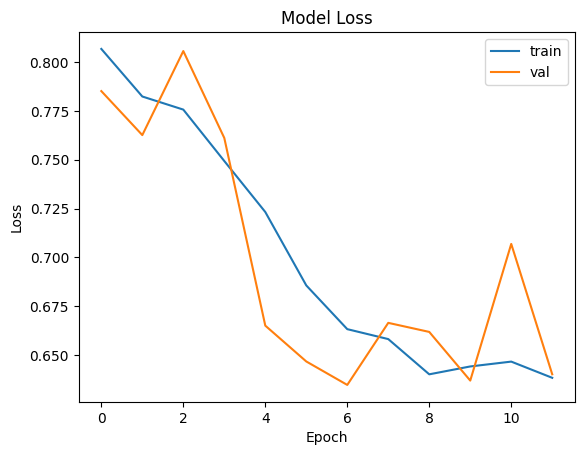

In [22]:
# plot loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper right')
plt.show()

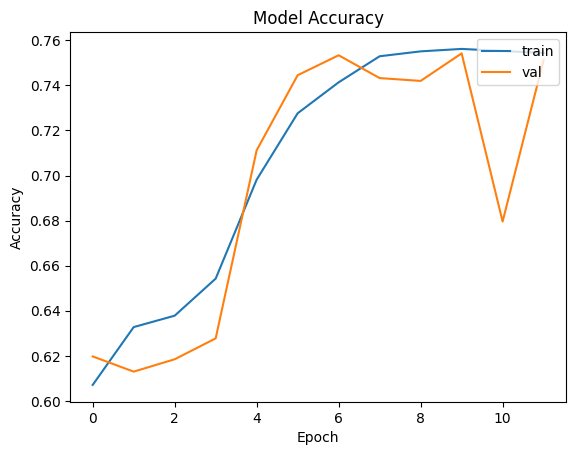

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
# predict on validation dataset
val_pred_model = x_model.predict(X_val)

# now predict on Test dataset and copy to CSV
test_model_predictions = x_model.predict(test_X_1)


165/165 [==============================] - 1s 5ms/step


In [25]:
# create DataFrame to write CSV file
test_model_data = pd.DataFrame(test_model_predictions, columns=['Status_C','Status_CL','Status_D'])
test_model_data.round(5)
test_model_data.insert(0, 'id', test_id)
test_model_data.to_csv('NeuralNetwork_Multi-Class_Prediction_JY.csv', index = False)

In [26]:
# check output
test_model_data.head(20)

,id,Status_C,Status_CL,Status_D
0,7905,0.825163,0.282709,0.220514
1,7906,0.825155,0.282751,0.220541
2,7907,0.824369,0.284475,0.223625
3,7908,0.825150,0.282785,0.220570
4,7909,0.825169,0.282693,0.220499
5,7910,0.825152,0.282779,0.220568
6,7911,0.825154,0.282759,0.220555
7,7912,0.824809,0.283496,0.221877
8,7913,0.821065,0.289982,0.235749
9,7914,0.823422,0.286546,0.227316


In [27]:
test_model_data.to_csv('submission.csv', index = False)
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv